✅ Dataset Loaded Successfully
Shape of data: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

✅ Data Split Complete
Training set: (120, 4)
Testing set: (30, 4)

🎯 RANDOM FOREST RESULTS
Accuracy: 90.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



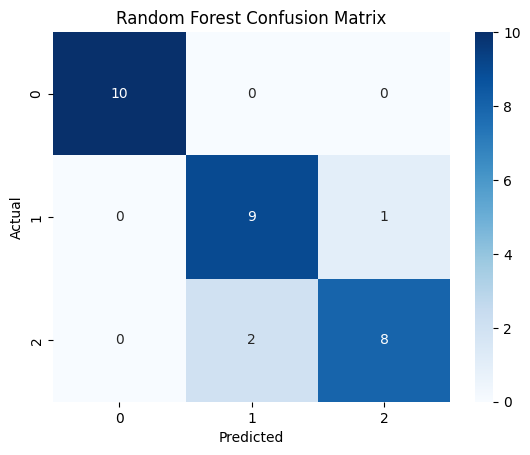


🤖 MLP NEURAL NETWORK RESULTS
Accuracy: 96.67 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



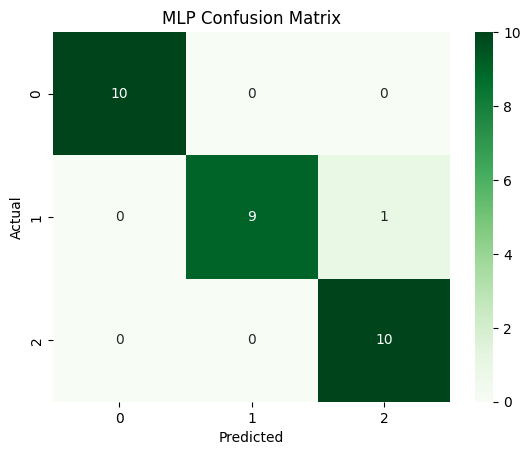


📊 MODEL COMPARISON
Random Forest Accuracy: 0.900
MLP Neural Network Accuracy: 0.967

✅ MLP performed better.


In [ ]:
# ================================================
# FLEXISAF EDUSOFT LIMITED INTERNSHIP - WEEK 2
# TASK: TRAIN MODELS (TWO ADVANCED ML TECHNIQUES)
# TECHNIQUES: Random Forest Classifier & MLP Classifier
# ================================================

# Step 1: Install dependencies (already installed in Colab but just in case)
!pip install -q scikit-learn pandas matplotlib seaborn

# Step 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 3: Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

print("✅ Dataset Loaded Successfully")
print("Shape of data:", X.shape)
print(X.head())

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n✅ Data Split Complete")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

# Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🎯 RANDOM FOREST RESULTS")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Train Neural Network (MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\n🤖 MLP NEURAL NETWORK RESULTS")
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp)*100, 2), "%")
print(classification_report(y_test, y_pred_mlp))

# Plot confusion matrix
cm2 = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Compare the two models
rf_acc = accuracy_score(y_test, y_pred_rf)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("\n📊 MODEL COMPARISON")
print(f"Random Forest Accuracy: {rf_acc:.3f}")
print(f"MLP Neural Network Accuracy: {mlp_acc:.3f}")

if rf_acc > mlp_acc:
    print("\n✅ Random Forest performed better.")
else:
    print("\n✅ MLP performed better.")
